In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from sklearn.metrics import pairwise_distances
import pandas as pd
import scipy.stats as ss
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.stats import kstest
from scipy.special import xlogy
import math

z_thresh = 4
filepath = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/"

In [3]:
def get_active_cells(traces):

    # going to return a dictionary with only active cells, formatted exactly the same as traces

    d = dict.fromkeys(traces.keys())

    for cell in traces:
        if traces[cell]['active'] == True:
            d[cell] = traces[cell]
        else:
            d.pop(cell,None)

    return d

In [4]:
def find_max_column(arr):
    # Find the column index of the global maximum value in the flattened array
    global_max_index = np.argmax(arr)

    # Convert the flattened index to row and column indices
    row_index, global_max_column_index = np.unravel_index(global_max_index, arr.shape)

    return global_max_column_index

In [5]:
# Load all required files for the psilocybin recording day

# saline_184 = "C:/Users/Conor/Documents/Imaging_Data/Two-Photon/Psilocybin_Project/Evoked_Cohort_Mice/ID184/12052022_GCaMP6s_ID184_psilo/TSeries-01012009-0054-028/suite2p/plane0/cells.pkl"
# psilo_184 = "C:/Users/Conor/Documents/Imaging_Data/Two-Photon/Psilocybin_Project/Evoked_Cohort_Mice/ID184/12052022_GCaMP6s_ID184_psilo/TSeries-01012009-0054-029/suite2p/plane0/cells.pkl"
saline_186 = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID186/12012022_GCaMP6s_ID186_psilo/TSeries-12012022-1321-026/suite2p/plane0/cells.pkl"
psilo_186 = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID186/12012022_GCaMP6s_ID186_psilo/TSeries-12012022-1321-027/suite2p/plane0/cells.pkl"

saline_237 = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID237/12122022_GCaMP6s_ID237_psilo/TSeries-12122022-1307-033/suite2p/plane0/cells.pkl"
psilo_237 = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID237/12122022_GCaMP6s_ID237_psilo/TSeries-12122022-1307-034/suite2p/plane0/cells.pkl"

saline_239 = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID239/01172023_Psilo/TSeries-01172023-1212-042/suite2p/plane0/cells.pkl"
psilo_239 = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID239/01172023_Psilo/TSeries-01172023-1212-043/suite2p/plane0/cells.pkl"

saline_251 = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID251/ID251_17012023_psilo/TSeries-01172023-1212-044/suite2p/plane0/cells.pkl"
psilo_251 = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID251/ID251_17012023_psilo/TSeries-01172023-1212-045/suite2p/plane0/cells.pkl"

saline_269 = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID269/ID269_08032023_psilocybin/TSeries-03082023-1211-065/suite2p/plane0/cells.pkl"
psilo_269 = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID269/ID269_08032023_psilocybin/TSeries-03082023-1211-066/suite2p/plane0/cells.pkl"

saline_276 = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID276/ID276_07032023_Psilocybin/TSeries-03072023-1303-063/suite2p/plane0/cells.pkl"
psilo_276 = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID276/ID276_07032023_Psilocybin/TSeries-03072023-1303-064/suite2p/plane0/cells.pkl"

saline_473 = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID473/psilo/TSeries-10132023-1324-139/suite2p/plane0/cells.pkl"
psilo_473 = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID473/psilo/TSeries-10132023-1324-140/suite2p/plane0/cells.pkl"

saline_474 = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID474/psilo/TSeries-10132023-1324-142/suite2p/plane0/cells.pkl"
psilo_474 = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/ID474/psilo/TSeries-10132023-1324-143/suite2p/plane0/cells.pkl"

all_dicts_saline = [saline_186,saline_237,saline_239,saline_251,saline_269,saline_276,saline_473,saline_474]
all_dicts_psilo = [psilo_186,psilo_237,psilo_239,psilo_251,psilo_269,psilo_276,psilo_473,psilo_474]
all_dicts_saline_str = ["saline_186","saline_237","saline_239","saline_251","saline_269","saline_276","saline_473","saline_474"]
all_dicts_psilo_str = ["psilo_186","psilo_237","psilo_239","psilo_251","psilo_269","psilo_276","psilo_473","psilo_474"]
saline_dict ={}
psilo_dict = {}

for file in all_dicts_saline_str:
    saline_dict[file]=None

for file in all_dicts_psilo_str:
    psilo_dict[file] = None


zippedsaline = zip(all_dicts_saline, all_dicts_saline_str)
for k,v in zippedsaline:
    with open(k,'rb') as f:
        saline_dict[v] = pickle.load(f)


zippedpsilo = zip(all_dicts_psilo, all_dicts_psilo_str)
for k,v in zippedpsilo:
    with open(k,'rb') as f:
        psilo_dict[v] = pickle.load(f)

In [6]:
cell_list_1 = list(saline_dict[all_dicts_saline_str[0]].keys())
dict_keys = list(saline_dict.keys())

nfreq = list(saline_dict[all_dicts_saline_str[0]][cell_list_1[0]]['traces'].keys())
nInt = list(saline_dict[all_dicts_saline_str[0]][cell_list_1[0]]['traces'][nfreq[0]].keys())
ntrial = list(saline_dict[all_dicts_saline_str[0]][cell_list_1[0]]['traces'][nfreq[0]][nInt[0]].keys())
print(nfreq, nInt, ntrial)
print(dict_keys)

[4364, 5371, 6612, 8140, 10020, 12335, 15184, 18691, 23009, 28324, 34867, 42922] [35, 50, 65, 80] [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
['saline_186', 'saline_237', 'saline_239', 'saline_251', 'saline_269', 'saline_276', 'saline_473', 'saline_474']


In [7]:
PRE = 'saline_186'
POST = 'psilo_186'

In [8]:
def compute_entropy(matrix):
    squared = matrix**2
    entropy = -xlogy(squared**2, squared**2).sum()
    return entropy

In [15]:
#  Get cell tuning and run SVD 

# all cells and tuning curves 

entropy_frequency_pre = []
entropy_frequency_post = []

for cell in saline_dict[PRE].keys():
    if saline_dict[PRE][cell]['active'] == True:
        cell_ID = saline_dict[PRE][cell]
        cell0 = cell_ID['deconvolved_traces']

        matrix = np.array([[[cell0[i][j][k] for k in ntrial] for j in nInt] for i in nfreq])
            # Average the matrix across trials
        matrix_av = matrix.mean(axis=2)

        # Reshape the matrix so that the baseline mean is subtracted from the mean of the response.  
        matrix_res = matrix_av[:,:,5:].mean(axis=-1) - matrix_av[:,:,:5].mean(axis=-1)

        # Runs SVD on the reshaped matrix, calculates the percentage variance explained.  If it is below threshold, moves onto next iteration.
        U, S, Vt = np.linalg.svd(matrix_res)
        S = S**2/(S**2).sum()

        entropy = compute_entropy(np.abs(U[:,0]))

        entropy_frequency_pre.append(entropy)

        # matrix_all.append(U[:,0].reshape(-1,1) @ Vt[0,:].reshape(1,-1))
        entropy_frequency_pre.append(entropy)
     

for cell in psilo_dict[POST].keys():
    if psilo_dict[POST][cell]['active'] == True:
        cell_ID = psilo_dict[POST][cell]
        cell0 = cell_ID['deconvolved_traces']

        matrix = np.array([[[cell0[i][j][k] for k in ntrial] for j in nInt] for i in nfreq])
            # Average the matrix across trials
        matrix_av = matrix.mean(axis=2)

        # Reshape the matrix so that the baseline mean is subtracted from the mean of the response.  
        matrix_res = matrix_av[:,:,5:].mean(axis=-1) - matrix_av[:,:,:5].mean(axis=-1)

        # Runs SVD on the reshaped matrix, calculates the percentage variance explained.  If it is below threshold, moves onto next iteration.
        U, S, Vt = np.linalg.svd(matrix_res)
        S = S**2/(S**2).sum()

        entropy = compute_entropy(np.abs(U[:,0]))

        entropy_frequency_post.append(entropy)

matrix_frequency_pre = np.array(entropy_frequency_pre)

matrix_frequency_post = np.array(entropy_frequency_post)

print(matrix_frequency_pre.shape)

print(matrix_frequency_post.shape)


[0.54492569 0.54492569 0.60914155 0.60914155 0.40660146 0.40660146
 0.61290171 0.61290171 0.41254697 0.41254697 0.06223387 0.06223387
 0.64447887 0.64447887 0.59761215 0.59761215 0.60385528 0.60385528
 0.58079129 0.58079129 0.59003911 0.59003911 0.6174466  0.6174466
 0.5156517  0.5156517  0.24976152 0.24976152 0.55005551 0.55005551
 0.08929081 0.08929081 0.4059096  0.4059096  0.64517306 0.64517306
 0.52329381 0.52329381 0.24634061 0.24634061 0.26954171 0.26954171
 0.67930206 0.67930206 0.34364447 0.34364447 0.65903705 0.65903705
 0.65674513 0.65674513 0.25832914 0.25832914 0.45195587 0.45195587
 0.59342244 0.59342244 0.65224083 0.65224083 0.54329055 0.54329055
 0.57913228 0.57913228 0.37511062 0.37511062 0.56792611 0.56792611
 0.51198273 0.51198273 0.54364713 0.54364713 0.52151435 0.52151435
 0.61185728 0.61185728 0.64051479 0.64051479 0.40335343 0.40335343
 0.25086152 0.25086152 0.05353013 0.05353013 0.39582435 0.39582435
 0.10937396 0.10937396 0.01718809 0.01718809 0.52492736 0.52492

In [16]:
from scipy.stats import mannwhitneyu

statistic, p_value = mannwhitneyu(matrix_frequency_pre, matrix_frequency_post)

print(f"Mann-Whitney U statistic: {statistic}")
print(f"P-value: {p_value}")

Mann-Whitney U statistic: 15718.0
P-value: 0.2512064919260374


(array([11.,  6.,  6.,  2.,  5.,  3., 10., 32., 28., 15.]),
 array([0.01842573, 0.08555246, 0.15267919, 0.21980592, 0.28693265,
        0.35405938, 0.42118611, 0.48831283, 0.55543956, 0.62256629,
        0.68969302]),
 <BarContainer object of 10 artists>)

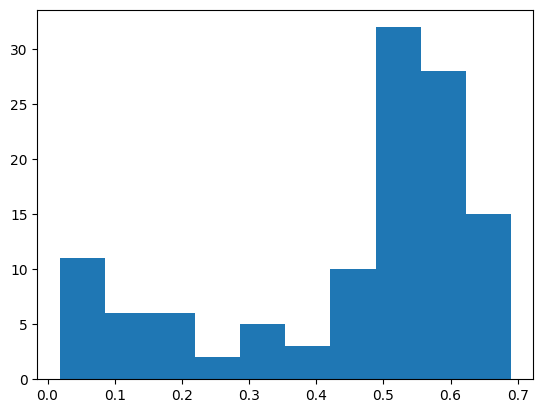

In [14]:
plt.hist(matrix_frequency_post)

In [32]:
print(matrix_frequency_post[0])

[2.39120841e-02 5.42474925e-04 2.56486401e-01 1.07238329e-02
 6.70019074e-01 3.66133935e-03 7.62685946e-04 4.89199307e-03
 2.31844589e-02 6.94927807e-01 4.65036825e-04 3.31929665e-02]


In [50]:



test = matrix_frequency_post[1]**2
print(test)
entropy = -xlogy(test**2, test**2).sum()
print(entropy)

[3.20726409e-02 3.45891347e-02 4.95008422e-02 3.51252057e-02
 1.16348396e-01 5.19415512e-01 4.06191942e-02 6.55487335e-02
 1.00384556e-01 3.86852006e-03 2.47657854e-04 2.27960769e-03]
0.5303636119494065


In [30]:
# EXTRACT INFORMATION ABOUT STIMULUS PARADIGM

# Access a cell in the dictionary to examine its tuning.   # To examine data used in report, use 427, 77, 138, 1181
INPUT_DESIRED_CELL = 62

cell_ID = saline_dict[PRE][INPUT_DESIRED_CELL]
cell = cell_ID['deconvolved_traces']
nfreq = list(cell_ID['deconvolved_traces'].keys())  # Which sound frequencies were presented (Hz)?
nInt = list(cell_ID['deconvolved_traces'][nfreq[0]].keys()) # What intensities were presented (dB)?
ntrial = list(cell_ID['deconvolved_traces'][nfreq[0]][nInt[0]].keys()) # How many trials for each condition? 
print("Conditions:",nfreq, nInt, ntrial)

# In this case, there should be 12 frequencies at four intensities (48 conditions), with ten repeats of each. 
# Each condition contains a 15-frame vector of that cell's trial's relative fluorescence for that trial. 

matrix = np.array([[[cell[i][j][k] for k in ntrial] for j in nInt] for i in nfreq])
print("The shape of this matrix is:", matrix.shape)

# Average the matrix across the trials axis, so that we have one mean response for each frequency intensity combination. 
matrix_av = matrix.mean(axis=2)

# Reshape the matrix so that the baseline period mean is subtracted from the response period.  
normalized_matrix = matrix_av[:,:,5:].mean(axis=-1) - matrix_av[:,:,:5].mean(axis=-1)

Conditions: [4364, 5371, 6612, 8140, 10020, 12335, 15184, 18691, 23009, 28324, 34867, 42922] [35, 50, 65, 80] [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
The shape of this matrix is: (12, 4, 10, 15)


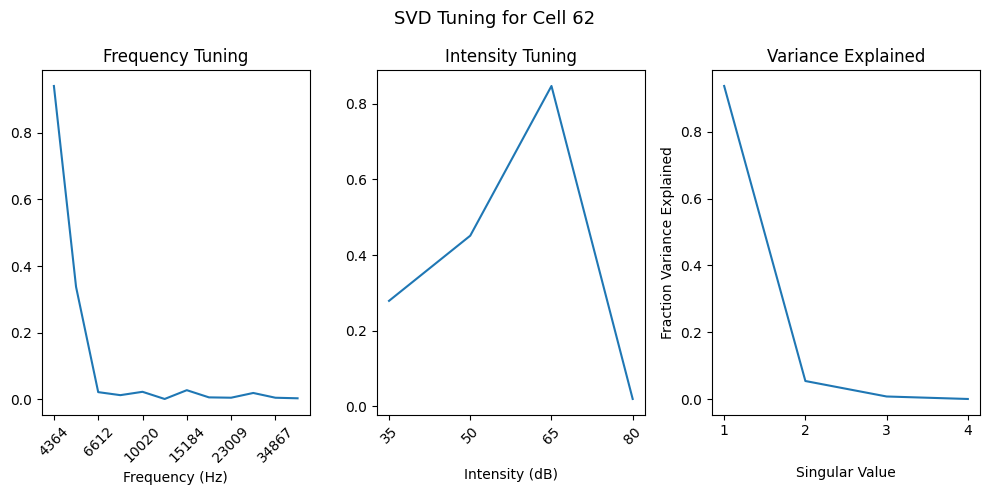

In [31]:
# PERFORMS SVD ON THE NORMALIZED MATRIX AND PLOTS LEFT (FREQUENCY) AND RIGHT (INTENSITY) SINGULAR VECTORS.
# IF THE FIRST SINGULAR VECTOR ACCOUNTS FOR MORE THAN 70% OF TOTAL VARIANCE, USES ONLY THIS, OTHERWISE USES
# THE SUM OF THE FIRST TWO SINGULAR VECTORS. 


# Perform SVD on the normalized matrix
U, S, Vt = np.linalg.svd(normalized_matrix)

fraction_variance = S**2/(S**2).sum()

U_var = np.abs(U[:,0]) if fraction_variance[0] > 0.8 else (np.abs(U[:,0]) + np.abs(U[:,1]))
Vt_var = np.abs(Vt[:,0]) if fraction_variance[0] > 0.8 else (np.abs(Vt[:,0]) + np.abs(Vt[:,1]))

fig, ax = plt.subplots(nrows=1,ncols=3, figsize=(10,5))

plt.suptitle('SVD Tuning for Cell ' + str(INPUT_DESIRED_CELL), fontsize=13)

ax[0].plot(U_var)
ax[0].set_xlabel("Frequency (Hz)")
ax[0].set_title("Frequency Tuning")
freq_positions = np.arange(len(nfreq))
ax[0].set_xticks(freq_positions[0::2])
ax[0].set_xticklabels(nfreq[0::2],rotation=45)

ax[1].plot(Vt_var)
ax[1].set_title("Intensity Tuning")
ax[1].set_xlabel("Intensity (dB)",labelpad=15)
ax[1].set_xticks(np.arange(len(nInt)))
ax[1].set_xticklabels(nInt,rotation=45)

ax[2].plot(S**2/(S**2).sum())
ax[2].set_xticks([0,1,2,3])
ax[2].set_xticklabels([1,2,3,4])
ax[2].set_title("Variance Explained")
ax[2].set_xlabel("Singular Value",labelpad=20)
ax[2].set_ylabel("Fraction Variance Explained")

plt.tight_layout()